 # Power Load Prediction for West Zone - Linear Model (Monthly)

In [284]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import pandas as pd
%matplotlib inline
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [285]:
power_data_west = pd.read_csv("westdata_augmented.csv")

/var/folders/7y/xgxlym8j2wvcdq_3kmlw40zm0000gn/T/ipykernel_83256/1727164072.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  power_data_west = pd.read_csv("westdata_augmented.csv")


In [286]:
power_data_west['end'] = pd.to_datetime(power_data_west['end'], infer_datetime_format=True)
indexedDataset = power_data_west.set_index(['end'])

In [287]:
power_data_west['end'].min()

Timestamp('2019-01-29 00:15:00')

In [288]:
power_data_west['end'].max()

Timestamp('2022-01-25 16:00:00')

In [289]:
power_data_west.head()

,Unnamed: 0,index_x,service,start,end,usage,cost,temp,event_flag,demand,sfm,index_y,dt,dt_iso,humidity,humidity_temp,pt_date
0,0,0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
1,1,1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
2,2,2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
3,3,3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
4,4,4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8,2019-01-29 01,681,1548752400,2019-01-29 09,21,63.41,2019-01-29 01


In [290]:
power_data_west['month'] = power_data_west['end'].dt.strftime('%b')

In [291]:
from calendar import month_abbr

lower_ma = [m.lower() for m in month_abbr]

# one-liner with Pandas
power_data_west['month_int'] = power_data_west['month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')

In [292]:
power_data_west_mod = power_data_west[['end','demand', 'temp', 'humidity', 'month_int']].copy() 

In [293]:
power_data_west_mod.head()

,end,demand,temp,humidity,month_int
0,2019-01-29 00:15:00,844.8,54.0,21,1
1,2019-01-29 00:30:00,841.6,54.0,21,1
2,2019-01-29 00:45:00,832.0,54.0,21,1
3,2019-01-29 01:00:00,848.0,54.0,21,1
4,2019-01-29 01:15:00,812.8,55.0,21,1


In [294]:
power_data_west_mod.describe()

,demand,temp,humidity,month_int
count,104596.000000,104588.00000,104608.000000,104608.00000
mean,1238.634456,67.39232,52.635401,6.54298
std,302.399419,16.59371,22.815913,3.43464
min,0.000000,29.00000,3.000000,1.00000
25%,1008.000000,54.00000,34.000000,4.00000
50%,1232.000000,66.00000,49.000000,7.00000
75%,1472.000000,79.00000,70.000000,10.00000
max,2124.800000,114.00000,100.000000,12.00000


In [295]:
power_data_west_mod.shape

(104608, 5)

In [296]:
power_data_west_monthly = power_data_west_mod.resample('M', on='end').agg({'demand':'sum', 'temp':'max', 'humidity':'max', 'month_int':'max'})

In [297]:
power_data_west_monthly.describe()

,demand,temp,humidity,month_int
count,3.700000e+01,37.000000,37.000000,37.000000
mean,3.501519e+06,92.378378,92.675676,6.351351
std,9.434659e+05,14.234839,8.618630,3.568506
min,2.772160e+05,65.000000,66.000000,1.000000
25%,2.839475e+06,81.000000,92.000000,3.000000
50%,3.485974e+06,91.000000,96.000000,6.000000
75%,4.200819e+06,105.000000,98.000000,9.000000
max,4.855107e+06,114.000000,100.000000,12.000000


In [298]:
power_data_west_monthly

,demand,temp,humidity,month_int
end,,,,
2019-01-31,277216.00,71.0,92,1
2019-02-28,2218374.40,73.0,97,2
2019-03-31,2509120.00,82.0,96,3
2019-04-30,2498371.21,96.0,95,4
2019-05-31,3713468.80,91.0,100,5
2019-06-30,4560950.40,107.0,82,6
2019-07-31,4615408.00,109.0,72,7
2019-08-31,4078729.60,107.0,81,8
2019-09-30,3485974.40,102.0,95,9


In [299]:
power_data_west_monthly = power_data_west_monthly[['demand', 'temp', 'humidity', 'month_int']].copy() 

In [300]:
power_data_west_monthly

,demand,temp,humidity,month_int
end,,,,
2019-01-31,277216.00,71.0,92,1
2019-02-28,2218374.40,73.0,97,2
2019-03-31,2509120.00,82.0,96,3
2019-04-30,2498371.21,96.0,95,4
2019-05-31,3713468.80,91.0,100,5
2019-06-30,4560950.40,107.0,82,6
2019-07-31,4615408.00,109.0,72,7
2019-08-31,4078729.60,107.0,81,8
2019-09-30,3485974.40,102.0,95,9


In [301]:
for i in range(1, 3):
    power_data_west_monthly["demand_lag_{}".format(i)] = power_data_west_monthly['demand'].shift(i)
    power_data_west_monthly["temp_lag_{}".format(i)] = power_data_west_monthly['temp'].shift(i)
    power_data_west_monthly["humidity_lag_{}".format(i)] = power_data_west_monthly['humidity'].shift(i)

In [302]:
power_data_west_monthly.head(10)

,demand,temp,humidity,month_int,demand_lag_1,temp_lag_1,humidity_lag_1,demand_lag_2,temp_lag_2,humidity_lag_2
end,,,,,,,,,,
2019-01-31,277216.00,71.0,92,1,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-28,2218374.40,73.0,97,2,277216.00,71.0,92.0,NaN,NaN,NaN
2019-03-31,2509120.00,82.0,96,3,2218374.40,73.0,97.0,277216.00,71.0,92.0
2019-04-30,2498371.21,96.0,95,4,2509120.00,82.0,96.0,2218374.40,73.0,97.0
2019-05-31,3713468.80,91.0,100,5,2498371.21,96.0,95.0,2509120.00,82.0,96.0
2019-06-30,4560950.40,107.0,82,6,3713468.80,91.0,100.0,2498371.21,96.0,95.0
2019-07-31,4615408.00,109.0,72,7,4560950.40,107.0,82.0,3713468.80,91.0,100.0
2019-08-31,4078729.60,107.0,81,8,4615408.00,109.0,72.0,4560950.40,107.0,82.0
2019-09-30,3485974.40,102.0,95,9,4078729.60,107.0,81.0,4615408.00,109.0,72.0


In [303]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [304]:
def timeseries_train_test_split(X, y, test_size):
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

dataset.kW.plot()

In [305]:
y = power_data_west_monthly.dropna()['demand']
X = power_data_west_monthly.dropna().drop(['demand'], axis=1)

In [306]:
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [307]:
X_train.shape

(24, 9)

In [308]:
y_train.shape

(24,)

In [309]:
X_test.shape

(11, 9)

In [310]:
y_test.shape

(11,)

In [311]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [312]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))

def mse_error(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=True)

def rmse_error(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=False)

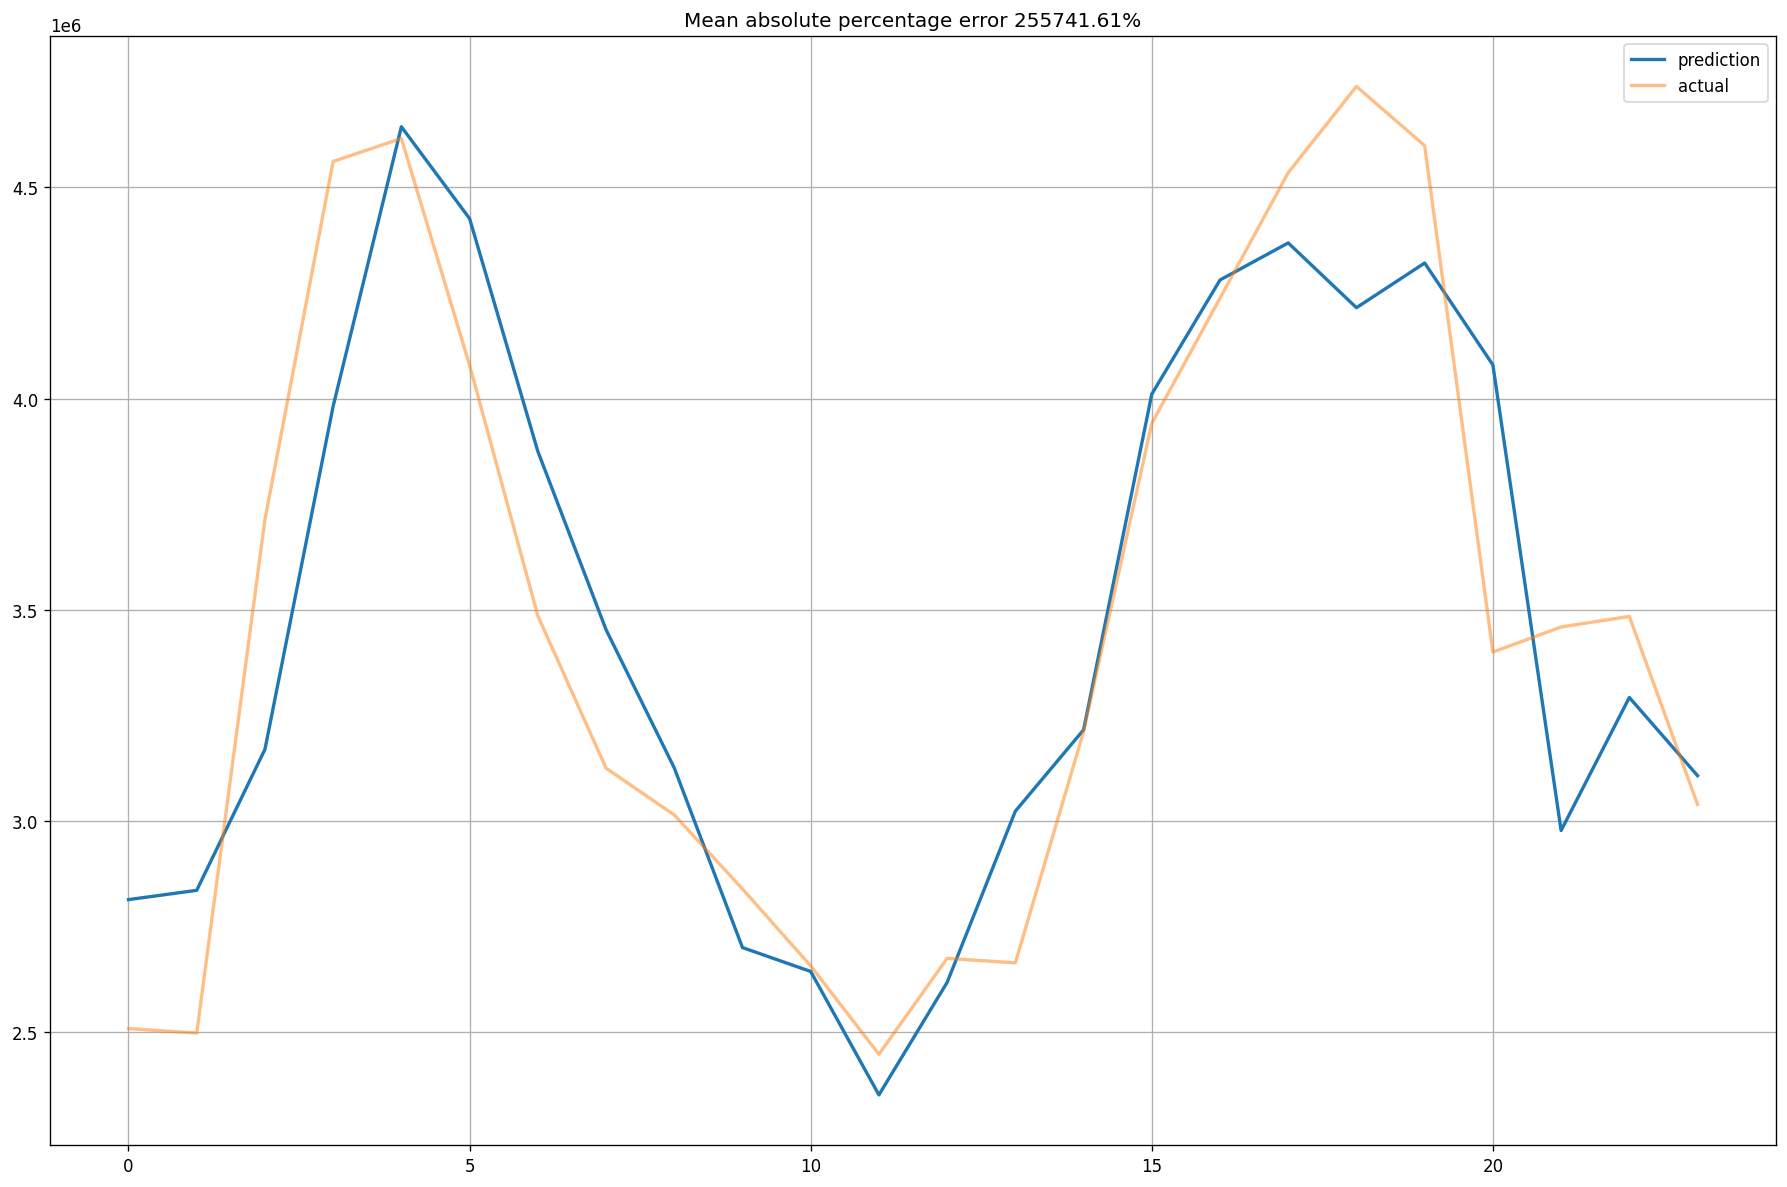

In [313]:
def plotModelTrainingResults(model, X_train=X_train, X_test=X_test):
  
    prediction = model.predict(X_train)
    
    plt.figure(figsize=(15, 10))
    plt.plot(prediction, label="prediction", linewidth=2.0)
    plt.plot(y_train.values, label="actual", linewidth=2.0, alpha=0.5)

    mape_error_var = mean_absolute_percentage_error(prediction, y_train)
    mae_error_var = mean_absolute_error(prediction, y_train)
    mse_error_var = mse_error(prediction, y_train)
    rmse_error_var = rmse_error(prediction, y_train)
    
    plt.title("Mean absolute percentage error {0:.2f}%".format(mape_error_var))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
    results = pd.DataFrame({'Actual':y_train, 
                            'Prediction':prediction  
                           })
    
    return results, mape_error_var, mae_error_var, mse_error_var, rmse_error_var
    
train_results, train_mape_error_var, train_mae_error_var, train_mse_error_var, train_rmse_error_var = plotModelTrainingResults(lr)

In [314]:
train_results['residual'] = train_results['Actual'] - train_results['Prediction']

In [315]:
train_results.tail(10)

,Actual,Prediction,residual
end,,,
2020-05-31,3211790.39,3.215994e+06,-4204.031364
2020-06-30,3941260.80,4.010375e+06,-69114.610542
2020-07-31,4237448.00,4.280403e+06,-42955.310643
2020-08-31,4534379.20,4.368164e+06,166214.802898
2020-09-30,4738486.40,4.214878e+06,523608.340458
2020-10-31,4598334.40,4.320645e+06,277689.475396
2020-11-30,3399993.60,4.079473e+06,-679479.826552
2020-12-31,3459385.60,2.977762e+06,481623.680885
2021-01-31,3484392.00,3.292594e+06,191797.899220


<AxesSubplot:xlabel='end'>

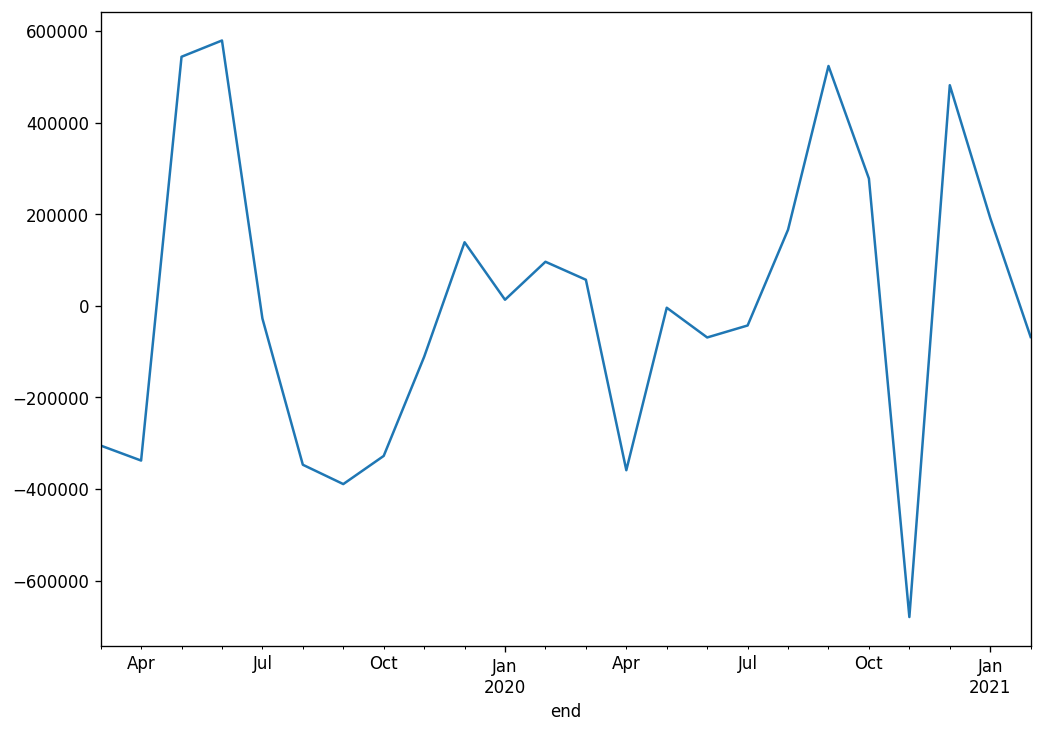

In [316]:
train_results['residual'].plot()

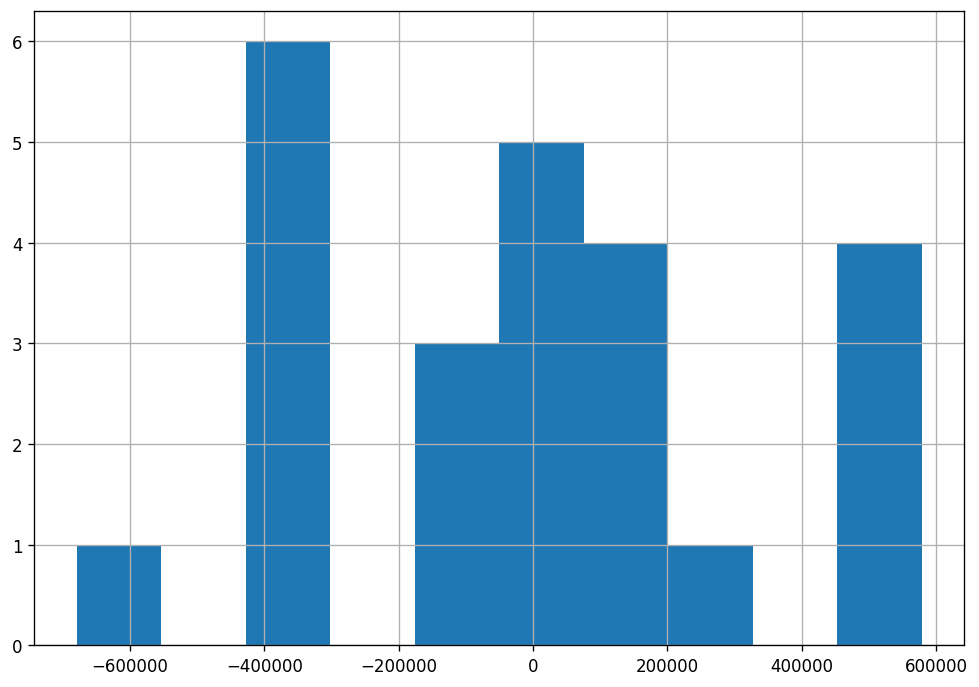

In [317]:
train_results['residual'].hist()
plt.show()

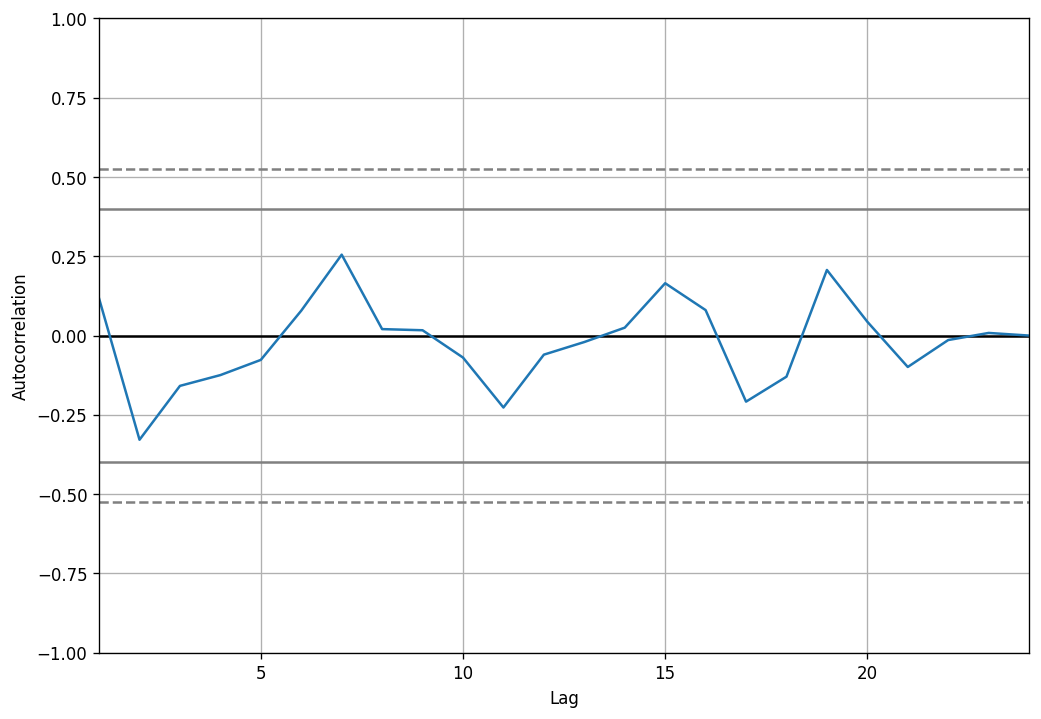

In [318]:
# autocorrelation
autocorrelation_plot(train_results['residual'])
plt.show()

In [319]:
print('MAPE: ' , train_mape_error_var)
print('MAE: ', train_mae_error_var)
print('MSE: ', train_mse_error_var)
print('RMSE: ', train_rmse_error_var)

MAPE:  7.338435286963653
MAE:  255741.60563238562
MSE:  104676879521.04034
RMSE:  323538.0650264206


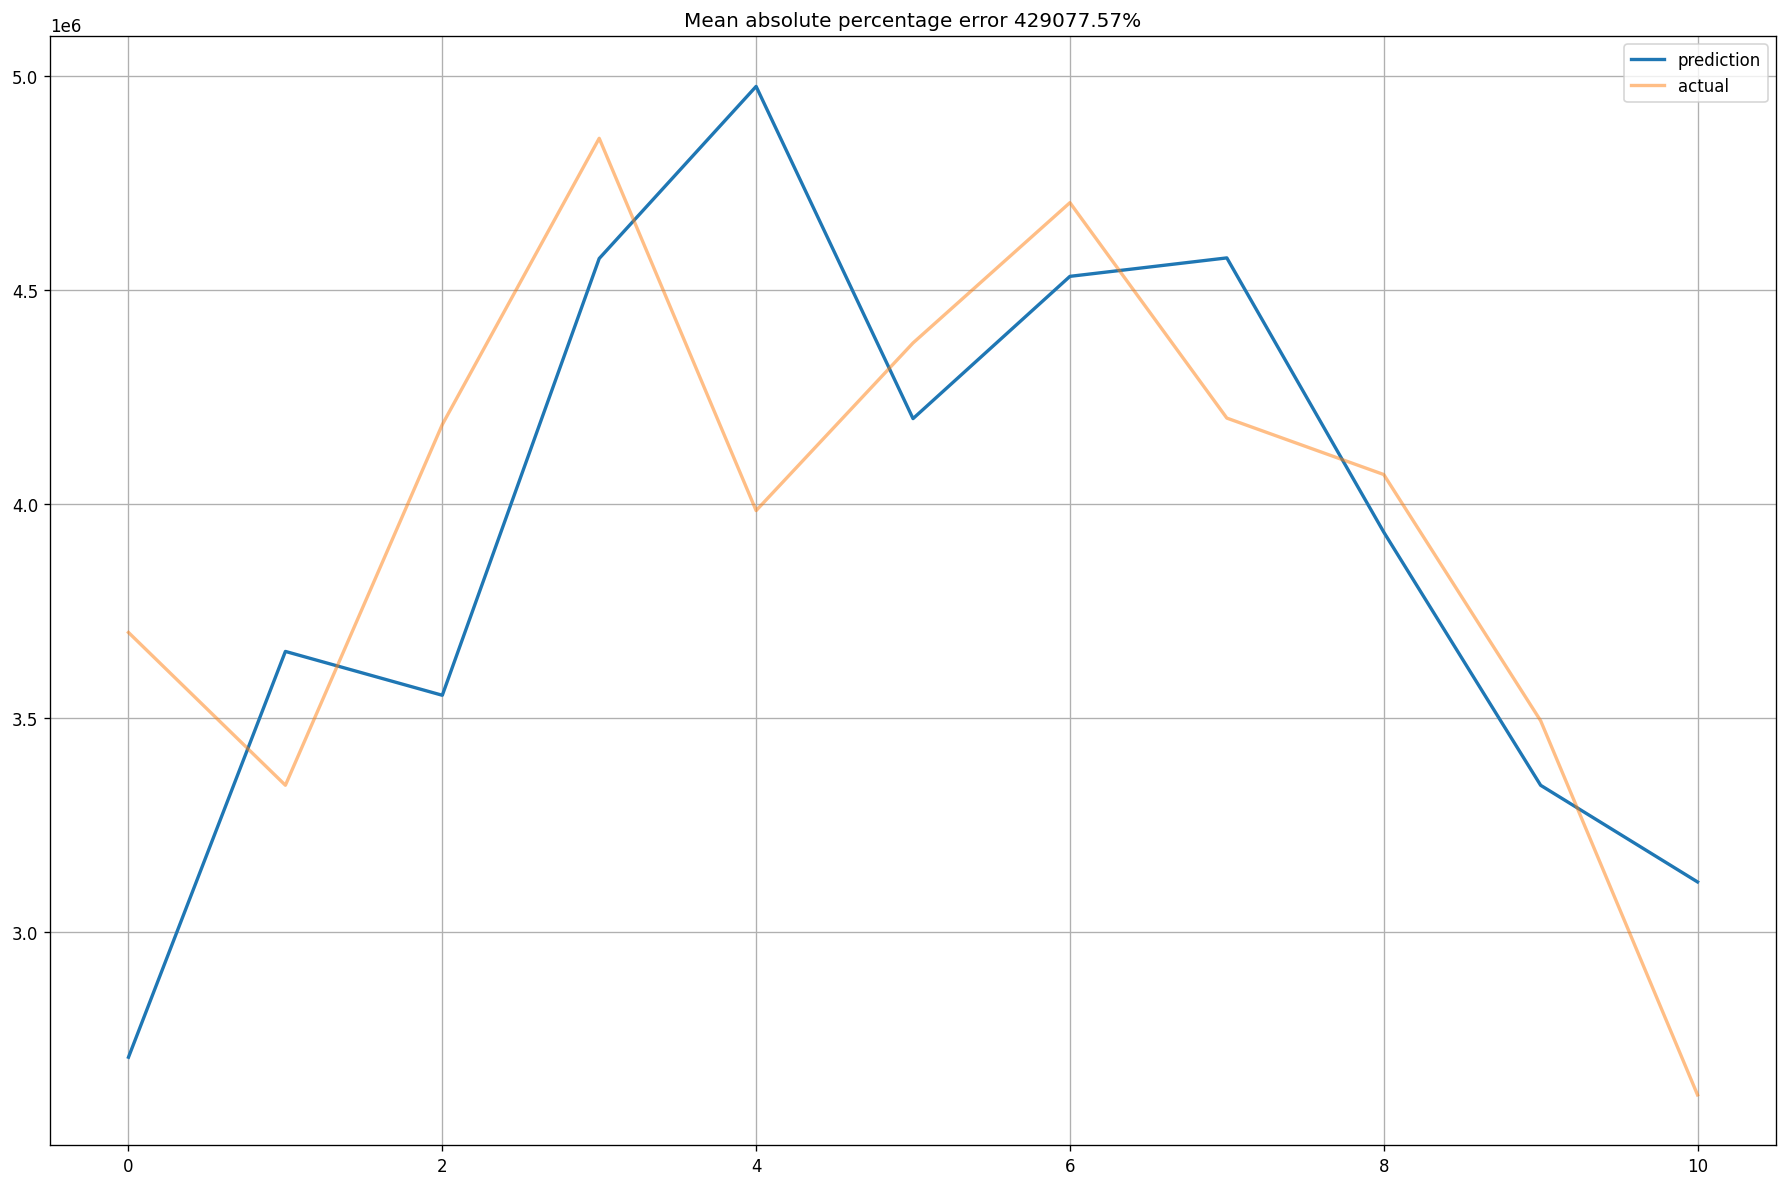

In [320]:
def plotModelPredictions(model, X_train=X_train, X_test=X_test):
  
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 10))
    plt.plot(prediction, label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0, alpha=0.5)

    mape_error_var = mean_absolute_percentage_error(prediction, y_test)
    mae_error_var = mean_absolute_error(prediction, y_test)
    mse_error_var = mse_error(prediction, y_test)
    rmse_error_var = rmse_error(prediction, y_test)
    
    plt.title("Mean absolute percentage error {0:.2f}%".format(mae_error_var))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
    results = pd.DataFrame({'Actual':y_test, 
                            'Prediction':prediction  
                           })
    
    return results, mape_error_var, mae_error_var, mse_error_var, rmse_error_var
    
results, mape_error_var, mae_error_var, mse_error_var, rmse_error_var = plotModelPredictions(lr)

In [321]:
results['residual'] = results['Actual'] - results['Prediction']

In [322]:
results.tail(10)

,Actual,Prediction,residual
end,,,
2021-04-30,3342217.60,3.655162e+06,-312944.810212
2021-05-31,4185731.20,3.552621e+06,633110.237250
2021-06-30,4855107.24,4.573984e+06,281122.851017
2021-07-31,3984480.00,4.976435e+06,-991955.111622
2021-08-31,4376488.00,4.199584e+06,176903.836625
2021-09-30,4704580.80,4.532279e+06,172301.502565
2021-10-31,4200819.20,4.575426e+06,-374606.596586
2021-11-30,4068856.00,3.934236e+06,134619.958959
2021-12-31,3493072.00,3.342088e+06,150984.041949


<AxesSubplot:xlabel='end'>

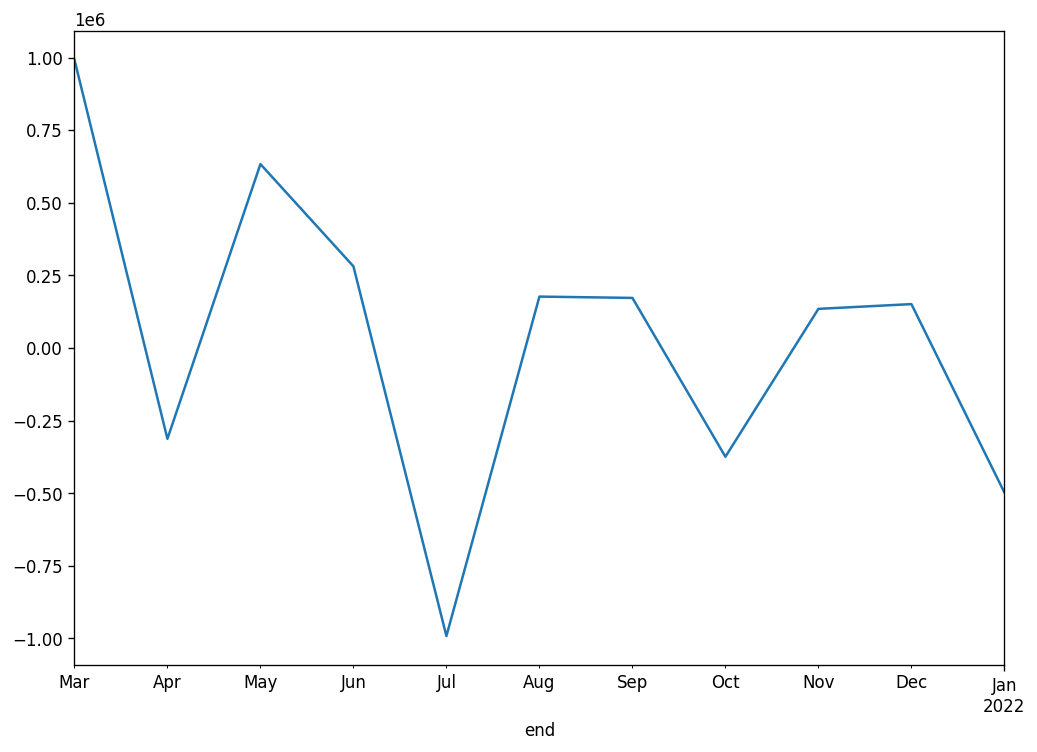

In [323]:
results['residual'].plot()

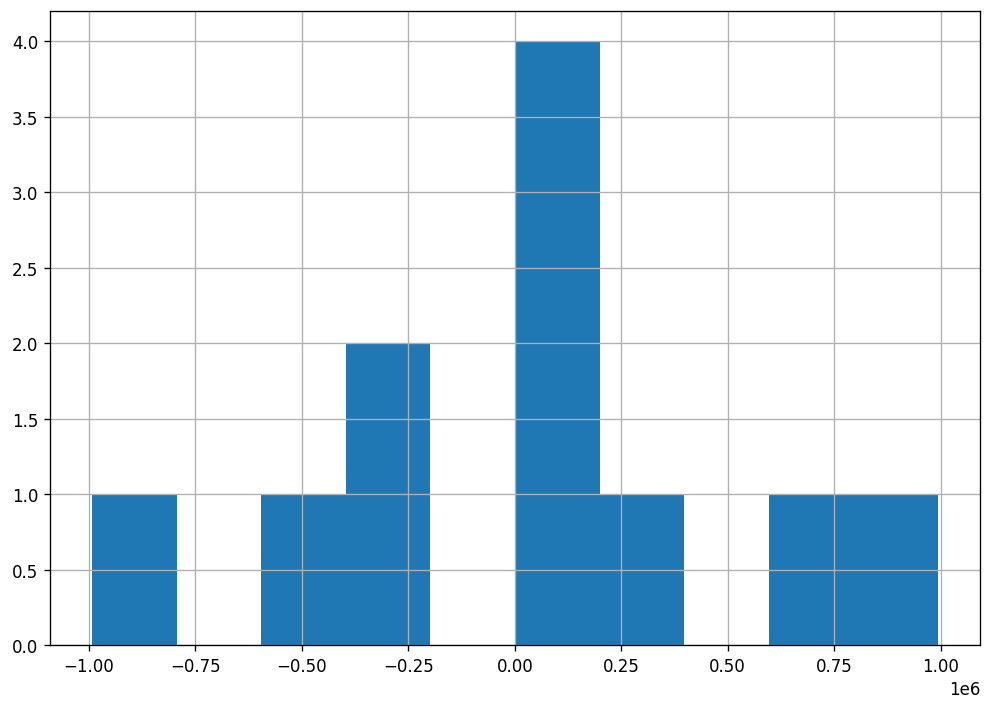

In [324]:
results['residual'].hist()
plt.show()

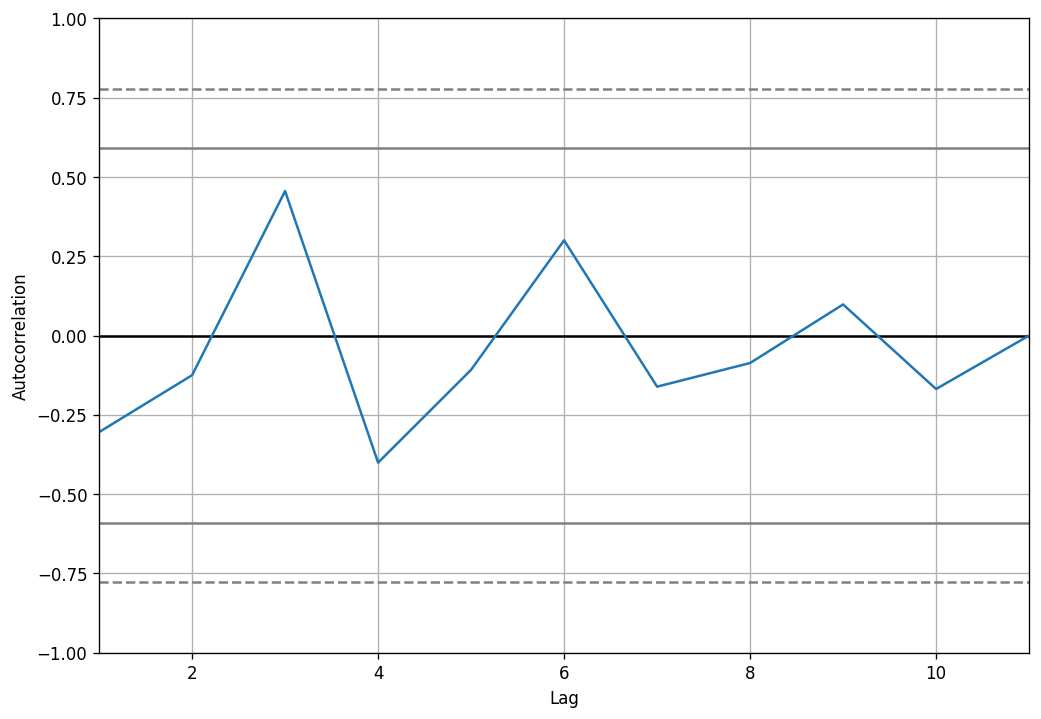

In [325]:
autocorrelation_plot(results['residual'])
plt.show()

In [326]:
print('MAPE: ' , mape_error_var)
print('MAE: ', mae_error_var)
print('MSE: ', mse_error_var)
print('RMSE: ', rmse_error_var)

MAPE:  11.753508564853897
MAE:  429077.56762903405
MSE:  276238813408.4556
RMSE:  525584.2590950148


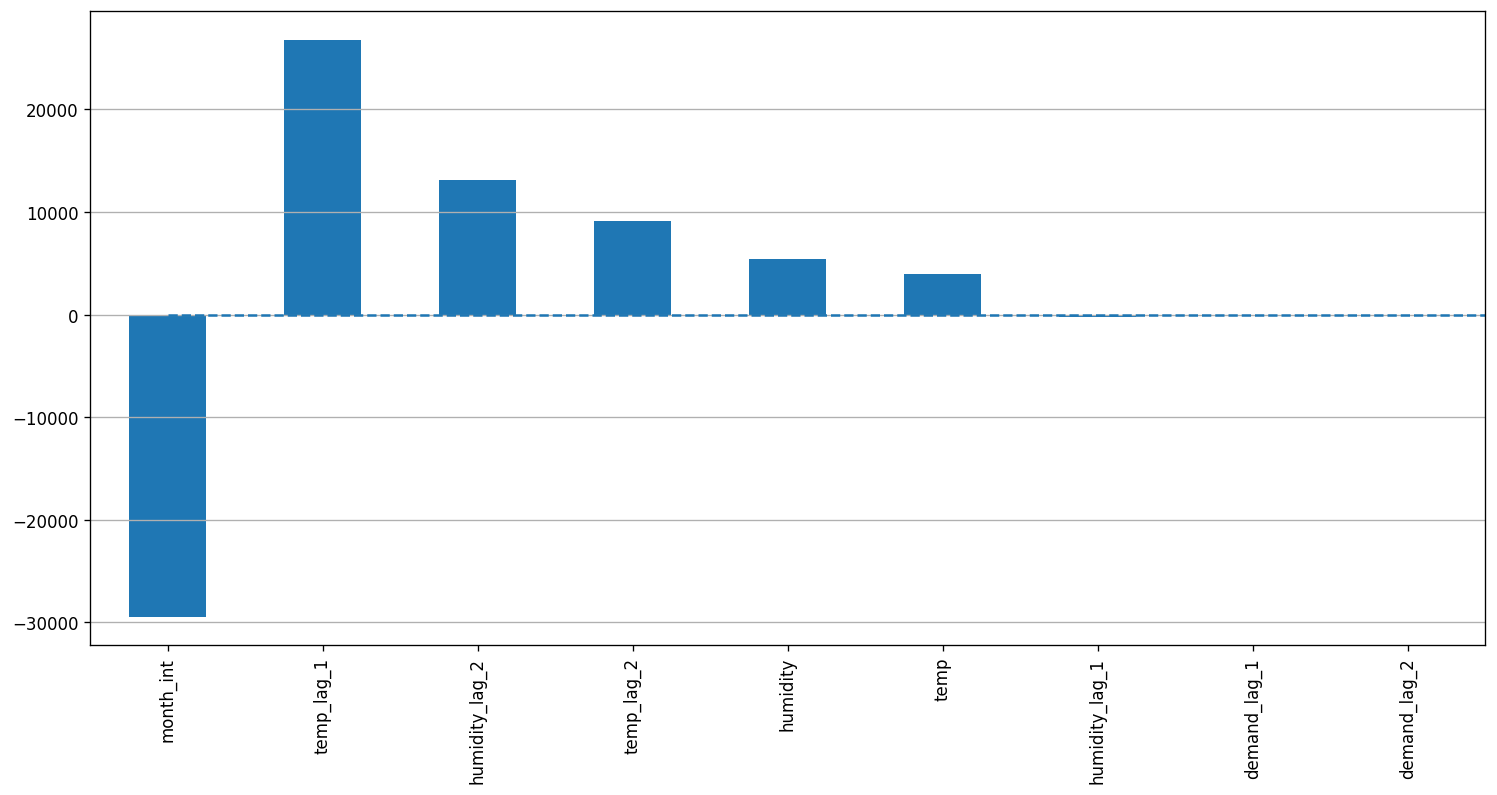

In [327]:
def plotCoefficients(model, maxDisplayValues=50):
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    plot_coefs = coefs.head(maxDisplayValues)
    
    plt.figure(figsize=(15, 7))
    plot_coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(plot_coefs), linestyles='dashed');

plotCoefficients(lr)